In [1]:
from src.models import Sequential
from src.layers import *
from src.activation_functions import *
from src.loss_functions import *

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
from tensorflow.keras.datasets.mnist import load_data as load_data_MNIST

(x_train, y_train), (x_test, y_test) = load_data_MNIST() # MNIST

In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
x_train_expanded = np.expand_dims(x_train, 1)
x_test_expanded = np.expand_dims(x_test, 1)

In [5]:
le = OneHotEncoder(sparse_output=False)

y_train_encoded = le.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = le.fit_transform(y_test.reshape(-1, 1))

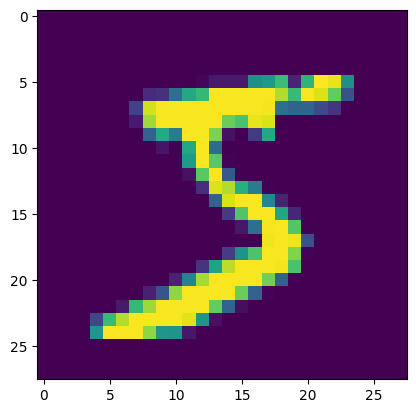

In [6]:
plt.imshow(np.einsum("chw -> hwc", x_train_expanded[0]))

In [7]:
model = Sequential(epochs=20, learning_rate=0.001, loss_function=CrossEntropy(), batch_size=1)

In [8]:
model.add(Conv2D(3, 3, 1, 1))
model.add(Activation(ReLU()))
model.add(Flatten())
model.add(Linear(n_inputs=2352, n_outputs=10))
model.add(Activation(Softmax()))

In [ ]:
model.train(x_train_expanded[:100], y_train_encoded[:100])

 25%|██▌       | 5/20 [00:42<02:07,  8.49s/it,  Loss: 1.4234112337745473]

In [ ]:
y_pred = model.predict(x_test_expanded[:1000])

In [ ]:
y_pred2 = np.argmax(y_pred, axis=1)
y_test2 = y_test[:1000]

cm_model = confusion_matrix(y_test2, y_pred2)

tn_model = cm_model[0][0]
fn_model = cm_model[0][1]
tp_model = cm_model[1][1]
fp_model = cm_model[1][0]
ConfusionMatrixDisplay(cm_model).plot(cmap='cubehelix')

# fpr, tpr, roc_auc = roc_curve(y_test, y_pred)
#
# rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
# rok_model.plot()

print("Czulosc:", tp_model / (tp_model + fn_model))
print("Swoistosc:", tn_model / (tn_model + fp_model))
print("Accuracy:", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

# print("ROC auc:", roc_auc_score(y_test, y_pred))
print("F1 score:", f1_score(y_test2, y_pred2, average='micro'))
print("BA score:", balanced_accuracy_score(y_test2, y_pred2))

In [ ]:
# the_image = np.asarray([[[
#     [1, 1, 1, 0, 0],
#     [0, 1, 1, 1, 0],
#     [0, 0, 1, 1, 1],
#     [0, 0, 1, 1, 0],
#     [0, 1, 1, 0, 0]
# ]]])

the_image = np.asarray([[[
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]],[[
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]],
[[
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]]])

In [ ]:
the_image.shape

In [ ]:
the_image2 = np.repeat(the_image[0][np.newaxis, :, :, :], 6, axis=0)
the_image2.shape

In [ ]:
batch = 3
channels = 1
height = 10
width = 10
the_image = np.random.random((batch, channels, height, width)).astype(np.float32)
the_image

In [ ]:
my_conv = Conv2D(
    n_filters=1,
    filter_size=3,
    stride=1,
    padding=1
)

In [ ]:
my_conv.weights = np.asarray([[[-1, -2, -1],
                               [0, 0, 0],
                               [1, 2, 1]]])

In [ ]:
my_conv.weights.shape

In [ ]:
my_conv.forward(the_image)

In [ ]:
my_conv.forward(the_image2).shape

In [ ]:
my_conv.forward(the_image)

In [ ]:
import tensorflow as tf

In [ ]:
random_array2 = np.einsum("bchw -> bhwc", the_image)
random_array2.shape

In [ ]:
filtr = np.asarray([[[[-1]],

        [[-2]],

        [[-1]]],


       [[[0]],

        [[0]],

        [[0]]],


       [[[1]],

        [[2]],

        [[1]]]])

In [ ]:
# random_array = np.random.random((1, 3, 10, 10))
# random_array2 = np.einsum("bchw -> bhwc", the_image)

tf_conv2d = tf.nn.conv2d_transpose(
    input=random_array2,
    output_shape=(3, 3, 3, 1),
    filters=filtr,
    padding='SAME',
    data_format='NHWC',
    strides=1
)

print(tf_conv2d)

In [ ]:
np.einsum("bhwc -> bchw", tf_conv2d)

In [ ]:
np.random.random((3, 3, 3, 1)).shape

In [ ]:

conv = Conv2D(1, 3, 1, 1)

In [ ]:
conv.weights

In [ ]:
# conv.forward(random_array).shape

In [ ]:
batch = np.random.randint(1, 100)
channels = 1
height = np.random.randint(10, 100)
width = height
the_image = np.random.random((batch, channels, height, width)).astype(np.float32)

print(the_image.shape)

filter_size = np.random.randint(1, 10)
filter_weights = np.random.random((
    filter_size,
    filter_size
))

my_conv = Conv2D(
    n_filters=1,
    filter_size=filter_size,
    stride=1,
    padding=0
)

my_conv.weights = np.expand_dims(filter_weights, 0).astype(np.float32)

print(my_conv.weights.shape)
print(np.expand_dims(filter_weights, (2, 3)).shape)

tf_conv2d = tf.nn.conv2d(
    input=np.einsum("bchw -> bhwc", the_image),
    filters=np.expand_dims(filter_weights, (2, 3)),
    padding='VALID',
    data_format='NHWC',
    strides=1
)
print(my_conv.forward(the_image).shape)
assert np.isclose(
    my_conv.forward(the_image),
    np.einsum("NHWC->NCHW", tf_conv2d)
).all()